In [3]:
import numpy as np
import imutils
import matplotlib.pyplot as plt 
import cv2
import torch

(128, 128, 2)
-5.0 5.0


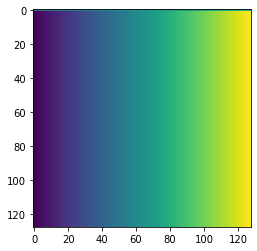

In [16]:

dim=128
# new_dim=128
scale_factors = [1.0]

def generate_coordinate_map(dim, rotation, scale, normalize=False):

    MAX_SCALE=5
    if normalize:
        scale = 1

    coordinate_dim = int(dim * (MAX_SCALE/scale))
    x, y = np.meshgrid(MAX_SCALE * np.linspace(-1 , 1, coordinate_dim), MAX_SCALE * np.linspace(-1 , 1, coordinate_dim), indexing="ij")
    x, y = x.reshape(coordinate_dim, coordinate_dim, 1), y.reshape(coordinate_dim, coordinate_dim, 1)
    xy = np.concatenate((x, y), axis=2)
    xy = imutils.rotate(xy, rotation)
    center = coordinate_dim/2

    new_dim = int(center + center * scale/MAX_SCALE) - int(center - center * scale/MAX_SCALE)
    offset = 0
    if int(new_dim) != dim:
        offset = int(dim - new_dim)

    xy = xy[int(center - center * scale/MAX_SCALE) : int(center + center * scale/MAX_SCALE) + offset, \
         int(center - center * scale/MAX_SCALE):int(center + center * scale/MAX_SCALE) + offset, :]

    return xy

#resize xy to newdim
rotation = 90
for scale in scale_factors:
    xy = generate_coordinate_map(dim, rotation, scale, normalize=False)

    print(xy.shape)
    print(np.min(xy[:, :, 0]) ,np.max(xy[:, :, 0]))
    plt.imshow(xy[:, :, 0])
    # plt.imshow(xy[:, :, 1])
    plt.show()


In [3]:
np.sqrt(2)/2

0.7071067811865476

In [3]:
stacked_vmaps = np.random.randn(*(2, 85, 128, 128))
max_indices = np.stack(np.unravel_index(np.argsort(np.ravel(stacked_vmaps))[::-1], stacked_vmaps.shape)).T
for index in max_indices:
    if index[2] >= 128:
        print("index[2] >= 128")
    if index[3] >= 128:
        print("index[3] >= 128")

4.917543810173919
4.917543810173919


tensor([[-0.0775, -2.5400, -1.8364,  2.2426,  1.8918,  2.2122,  0.9824, -0.6323,
         -1.3247,  1.1198, -1.0925,  0.0098,  0.9922, -0.1039,  0.2943, -1.1437,
         -0.5673,  0.3605,  0.8542, -1.6861, -0.1360,  2.6022,  0.0558, -1.6937,
          1.4636, -0.5042, -1.2971,  1.7204,  0.4276,  1.3524, -0.7655, -1.1150,
          0.1522, -1.2680,  1.1914,  1.0481,  0.1160, -0.5537, -2.9938, -2.3115,
          1.6153, -1.6864,  1.3691, -0.1584, -0.3974, -1.7196, -0.2959,  0.7805,
         -0.0934,  0.4119, -0.4002,  1.5685, -0.3497, -0.4576,  1.5394, -0.2631,
         -0.8592, -0.8034, -0.0789, -1.8742, -0.1313,  0.3148, -0.2495, -1.2354,
          1.1251, -0.9087, -0.4294,  0.9375, -0.4508, -0.5510,  0.0676, -0.6444,
          2.2489, -0.3261, -2.3079, -1.7496, -0.4070,  1.2791, -2.0077,  0.4491,
          0.1019, -0.2429, -0.7699,  1.2701, -1.4982, -0.3860, -0.1171,  0.8454,
          0.7757, -1.7971,  0.4363,  0.1005,  0.4259, -0.6884, -0.4389,  0.6690,
          1.9637, -0.4531, -